Author: Xiaocan Li

E-mail: lixiaocan2017@ia.ac.cn

Follow me on [My GitHub](https://github.com/HsiaoTsan).

Last modified: 10, Nov, 2018

# Method 1: use SVD to do PCA
Courtesy of [yalefaces database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html).

First, import necessary module.

In [125]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

Read image data and combine into a matrix: `X_with_mean`

In [126]:
path='/home/lxc/pycode_lxc/yalefaces/'
f = open('path.txt')
X_with_mean = []
lines = [line.rstrip('\n') for line in f]

for i in range(len(lines)):
    img=cv2.imread(path+lines[i], 0)
    face_resize = cv2.resize(img, (0,0), fx = 0.5, fy = 0.5)
    X_with_mean.append(face_resize.flatten())

X_with_mean = np.matrix(X_with_mean).T
print X_with_mean.shape
x_mean = np.mean(X_with_mean, axis = 1)
print x_mean.shape

(2500, 165)
(2500, 1)


Show average face:

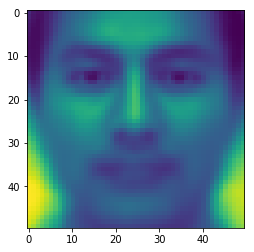

In [127]:
# Show average face.
avg_face = x_mean.reshape(50, 50)
plt.imshow(avg_face)
plt.show()

subtract the mean (column-wise), then do SVD.

In [128]:
# SVD the mean subtracted matrix
X = X_with_mean - x_mean
print X.shape
#covX = X.dot(X.T)
# print covX.shape
U, S, VT = np.linalg.svd(X)

(2500, 165)


In [132]:
Tu[:,0]/U[:, 0]

matrix([[-13681.85836872-0.j],
        [-13681.85836872+0.j],
        [-13681.85836872+0.j],
        ..., 
        [-13681.85836872+0.j],
        [-13681.85836872+0.j],
        [-13681.85836872+0.j]])

In [138]:
np.linalg.norm(U[:, 0])

1.0000000000000004

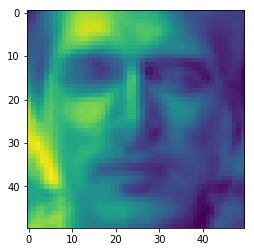

In [154]:
plt.imshow(U[:, 0].reshape(50,50))
plt.show()

In [137]:
print U[:, 0]

[[-0.00203521]
 [ 0.00032527]
 [ 0.00461321]
 ..., 
 [ 0.00313696]
 [ 0.00214953]
 [ 0.00265873]]


In [129]:
print Tu[:, 0]

[[ 27.84549101+0.j]
 [ -4.45028521+0.j]
 [-63.11733936+0.j]
 ..., 
 [-42.91949621+0.j]
 [-29.40955556+0.j]
 [-36.37638878+0.j]]


In [5]:
print U.shape, VT.shape

(2500, 2500) (165, 165)


Set `MAX_NUM_EIGEN`, get the first `MAX_NUM_EIGEN` columns of `U` as principal axes,

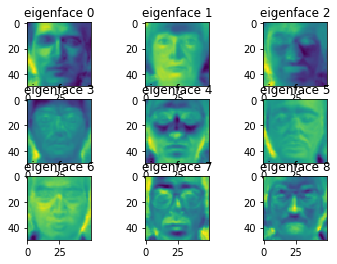

In [6]:
MAX_NUM_EIGEN = 10
eigenfaces = U[:, :MAX_NUM_EIGEN] # eigenvector(eigenface)

for i in range(9):
    plt.subplot(int("33"+str(i+1))); plt.title('eigenface ' + str(i))
    plt.imshow(eigenfaces[:, i].reshape(50, 50))
plt.show()

Show recovered face:

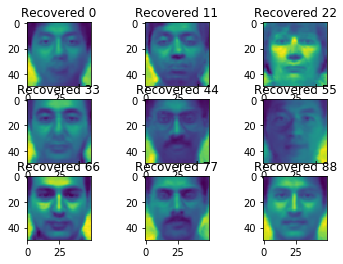

In [7]:
weights = eigenfaces.T.dot(X) # get weights, or coordinates under eigenfaces bases.
face_rec = eigenfaces.dot(weights) + x_mean # recover data 

for i,v  in enumerate(range(0, 99, 11)):
    plt.subplot(int("33"+str(i+1))); plt.title('Recovered ' + str(v))
    plt.imshow(face_rec[:, v].reshape(50, -1))
               
plt.show()

# Method 2: use OpenCV built-in PCA method
use your own `weights` list to generate new face

I didn't use `createDataMatrix` function to form an image stacked array.

I use `X_with_mean` in previous method.

## modified from original code  [here](https://www.learnopencv.com/eigenface-using-opencv-c-python/)

In [7]:

import cv2

def createDataMatrix(images):
    print("Creating data matrix")
    ''' 
    Allocate space for all images in one data matrix. 
        The size of the data matrix is
        ( w  * h, numImages )
        where,
        w = width of an image in the dataset.
        h = height of an image in the dataset.
        3 is for the 3 color channels.
        '''
   
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, sz[0] * sz[1]), dtype=np.float32)
    for i in xrange(0, numImages):
        image = images[i].flatten()
        data[i,:] = image
     
    print("DONE")
    return data

def createNewFace(weights):
    # Start with the mean image
    output = averageFace
    print output.shape
    # Add the eigen faces with the weights
    for i in xrange(0, NUM_EIGEN_FACES):
        output = np.add(output, eigenFaces[i] * weights[i])
 
    # Display Result at 2x size
    output = cv2.resize(output, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output.astype(np.uint8))



if __name__ == '__main__':
    NUM_EIGEN_FACES = 10
    
    data = X_with_mean.T # I use X_with_mean from previous method
    sz = [50, 50]
     # Compute the eigenvectors from the stack of images created
    print("Calculating PCA... ")
    mean, eigenVectors = cv2.PCACompute(data, mean=None, maxComponents=NUM_EIGEN_FACES)
    print ("DONE")
    averageFace = mean.reshape(50,50)
    eigenFaces = []; 
    for eigenVector in eigenVectors:
        eigenFace = eigenVector.reshape(sz)
        eigenFaces.append(eigenFace)
     # Create window for displaying Mean Face
     # Display result at 2x size
    output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
    cv2.imshow("average face", output.astype(np.uint8))
    
    # modify weights to see what face you will get
    weights = [100]*5+[300]*2+[-100]*3
    createNewFace(weights)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

Calculating PCA... 
DONE
(50, 50)


Eigenvectors computed by OpenCV is different from that of numpy SVD decomposition.

Some of their respective weights are **additive inverses**.

Check the following.

In [8]:
print eigenVectors.shape

(10, 2500)


In [9]:
W = eigenVectors.dot(X_with_mean - mean.T)
print W[:, 0]
print W[:, 0].shape

[[ 553.16937256]
 [ -57.80566025]
 [ 386.89044189]
 [-905.68865967]
 [  12.90867615]
 [  -1.89941895]
 [  73.98457336]
 [-256.55938721]
 [ 553.76678467]
 [ -59.5631218 ]]
(10, 1)


In [10]:
#weights by SVD
W_svd = X.T.dot(U[:, 0:10]).T
print W_svd.shape

(10, 165)


In [12]:
W_svd[:, 0]

matrix([[ 553.16871173],
        [  57.80584737],
        [ 386.88998432],
        [ 905.68922907],
        [ -12.95403063],
        [   1.89996627],
        [ -73.98366259],
        [ 256.55983988],
        [-553.76071127],
        [  59.60897783]])

compare `W[:, 0]` and `W_svd[:, 0]`, some entries are additive inverses.

Take a look at the eigenvectors by both OpenCV built-in method, and SVD.

In [13]:
eigenVectors[1]

array([-0.04203549, -0.03126767, -0.02121748, ...,  0.04195167,
        0.04067727,  0.04145189], dtype=float32)

In [14]:
U[:, 1]

matrix([[ 0.04203549],
        [ 0.03126767],
        [ 0.02121749],
        ..., 
        [-0.04195169],
        [-0.04067728],
        [-0.04145191]])

**array/martix with shape (2500,) and (2500,1) should not do subtraction.**

**Use reshape(2500, 1).**

**array and matrix can do subtraction as long as they share the same shape**

In [15]:
# very small number
# means eigenVectors[1] = - U[:, 1]
np.linalg.norm(eigenVectors[1].reshape(-1,1) + U[:, 1])

6.2459216868813559e-07

we get nearly zero, which means `eigenVectors[1] = - U[:, 1]`.

That's why some entries of `W[:, 1]` is additive.

# Study SVD

In [53]:
M = [[1,1],[0,1]]
U, S, VT = np.linalg.svd(M)
print "*"*30+"U"
print U
print "*"*30+"S"
print S
print "*"*30+"VT"
print VT

******************************U
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
******************************S
[ 1.61803399  0.61803399]
******************************VT
[[ 0.52573111  0.85065081]
 [-0.85065081  0.52573111]]


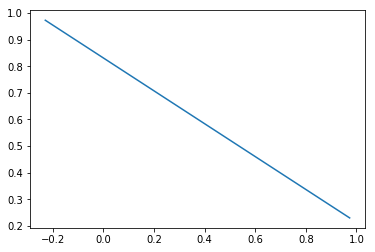

In [51]:
plt.plot(U[0, :], U[1, :])

In [52]:
A1 = np.matmul(U[:, 0].reshape(-1,1), VT[0, :].reshape(1,-1))
print "*"*30 + "A1"
print A1
A2 = np.matmul(U[:, 1].reshape(-1,1), VT[1, :].reshape(1,-1))
print "*"*30 + "A2"
print A2

******************************A1
[[ 0.82789504  0.51166727]
 [ 0.19543951  0.12078826]]
******************************A2
[[ 0.12078826 -0.19543951]
 [-0.51166727  0.82789504]]


### the relationship of eigen-decomposition between $MM^T$ and $M^TM$:

verify that $S = MM^T$ and $T=M^TM$,

$Tv = M^TMv=\lambda v$

multiply $M$ to both sides,

$MM^TMv = \lambda Mv$

so $Mv$ is an eigenvector of $MM^T$ that shares the same eigenvalue with $M^TM$.

see [Wiki :Eigenface](https://en.wikipedia.org/wiki/Eigenface), search "computing the eigenvectors".

In [31]:
M = np.array([[1,1,1],[1,2,3]]).T
Sm = M.dot(M.T)
Tm = M.T.dot(M)
print Sm
print Tm

[[ 2  3  4]
 [ 3  5  7]
 [ 4  7 10]]
[[ 3  6]
 [ 6 14]]


In [36]:
U1, S1, VT1 = np.linalg.svd(Tm)
eigval1, eigvec1 = np.linalg.eig(Tm)

print U1,"\n", S1,"\n", VT1, "\n"+"*"*30
print eigval1,"\n", eigvec1

[[-0.40266324 -0.91534819]
 [-0.91534819  0.40266324]] 
[ 16.6394103   0.3605897] 
[[-0.40266324 -0.91534819]
 [-0.91534819  0.40266324]] 
******************************
[  0.3605897  16.6394103] 
[[-0.91534819 -0.40266324]
 [ 0.40266324 -0.91534819]]


In [42]:
U2, S2, VT2 = np.linalg.svd(Sm)
eigval2, eigvec2 = np.linalg.eig(Sm)

print U2,"\n", S2,"\n", VT2, "\n"+"*"*30
print eigval2,"\n", eigvec2

[[-0.32310986  0.85377594  0.40824829]
 [-0.54750702  0.18321952 -0.81649658]
 [-0.77190419 -0.4873369   0.40824829]] 
[  1.66394103e+01   3.60589702e-01   3.00455603e-16] 
[[-0.32310986 -0.54750702 -0.77190419]
 [ 0.85377594  0.18321952 -0.4873369 ]
 [-0.40824829  0.81649658 -0.40824829]] 
******************************
[  1.66394103e+01   3.60589702e-01   2.43248409e-16] 
[[-0.32310986 -0.85377594  0.40824829]
 [-0.54750702 -0.18321952 -0.81649658]
 [-0.77190419  0.4873369   0.40824829]]


In [92]:
[np.linalg.norm(eigvec2[:, i]) for i in range(3)]

[0.99999999999999989, 0.99999999999999989, 1.0]

some elements have different arrangements of negation, so the norm may not be 0.

In [51]:
np.linalg.norm(U2-eigvec2)

1.9999999999999998

$S_m=U_{eig}\Lambda U_{eig}^T$

In [52]:
(eigvec2.dot(np.diag(eigval2))).dot(eigvec2.T)

array([[  2.,   3.,   4.],
       [  3.,   5.,   7.],
       [  4.,   7.,  10.]])

$T_m=U_{eig}\Lambda U_{eig}^T$

In [61]:
(eigvec1.dot(np.diag(eigval1))).dot(eigvec1.T)

array([[  3.,   6.],
       [  6.,  14.]])

for symmetric matrix $M$(which is $S_m$ is the following code),

$U,S,V^T=\mathbf{SVD}(M)$

we have $U = V$:**(No, It's not true!)**

In [53]:
np.linalg.norm(U2 - VT2.T)

2.0

Verify that $M^TMe=\lambda e$,

then

$(MM^T)(Me)=\lambda(Me)$

In [75]:
Me = M.dot(eigvec1[:, ::-1])
print Me
print eigvec2

[[-1.31801143 -0.51268495]
 [-2.23335963 -0.11002171]
 [-3.14870782  0.29264153]]
[[-0.32310986 -0.85377594  0.40824829]
 [-0.54750702 -0.18321952 -0.81649658]
 [-0.77190419  0.4873369   0.40824829]]


In [80]:
l = Sm.dot(Me)
l

array([[ -2.19309330e+01,  -1.84868914e-01],
       [ -3.71617872e+01,  -3.96726959e-02],
       [ -5.23926413e+01,   1.05523522e-01]])

In [81]:
r = Me.dot(np.diag(eigval2[:2]))
r

array([[ -2.19309330e+01,  -1.84868914e-01],
       [ -3.71617872e+01,  -3.96726959e-02],
       [ -5.23926413e+01,   1.05523522e-01]])

In [82]:
np.linalg.norm(l-r)

3.2047790621317363e-14

# Use the property above to improve the decomposition speed.

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [84]:
path='/home/lxc/pycode_lxc/yalefaces/'
f = open('path.txt')
X_with_mean = []
lines = [line.rstrip('\n') for line in f]

for i in range(len(lines)):
    img=cv2.imread(path+lines[i], 0)
    face_resize = cv2.resize(img, (0,0), fx = 0.5, fy = 0.5)
    X_with_mean.append(face_resize.flatten())

X_with_mean = np.matrix(X_with_mean).T
print X_with_mean.shape
x_mean = np.mean(X_with_mean, axis = 1)
print x_mean.shape

(2500, 165)
(2500, 1)


In [187]:
# SVD the mean subtracted matrix
X = X_with_mean - x_mean
# X = X_with_mean
print X.shape

Tm = X.T.dot(X)
print Tm.shape

(2500, 165)
(165, 165)


In [188]:
eigval_m, eigvec_m = np.linalg.eig(Tm)
print eigvec_m.shape
print eigval_m[:5] # make sure it's in descending order
# [np.linalg.norm(eigvec_m[:, i]) for i in range(eigval_m.size)]

(165, 165)
[  1.87193248e+08+0.j   1.65349695e+08+0.j   1.22088106e+08+0.j
   6.65904291e+07+0.j   4.35805488e+07+0.j]


$covX = XX^T$,

$eig(covX) = \Lambda_{T_m}, X*Eigenvector_{T_m}$

In [189]:
eigvec_of_covX = X.dot(eigvec_m)
print eigvec_of_covX.shape

(2500, 165)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


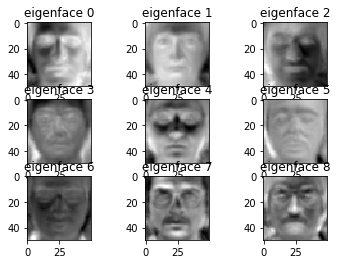

In [194]:
MAX_NUM_EIGEN = 10
eigenfaces = eigvec_of_covX[:, :MAX_NUM_EIGEN] # eigenvector(eigenface)
for i in range(9):
    plt.subplot(int("33"+str(i+1))); plt.title('eigenface ' + str(i))
    plt.imshow(eigenfaces[:, i].reshape(50, 50).astype(np.float), cmap = 'gray')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


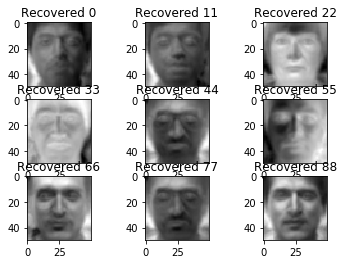

In [193]:
weights = eigenfaces.T.dot(X) # get weights, or coordinates under eigenfaces bases.
face_rec = eigenfaces.dot(weights) + x_mean# recover data 

for i,v  in enumerate(range(0, 99, 11)):
    plt.subplot(int("33"+str(i+1))); plt.title('Recovered ' + str(v))
    plt.imshow(face_rec[:, v].reshape(50, -1).astype(np.float), cmap = 'gray')
               
plt.show()